# Handwritten Character Recognition - Baseline Modeling

This notebook focuses on building baseline machine learning models on the preprocessed EMNIST dataset.

The goal is to establish performance benchmarks, analyze class-wise behavior, and understand the difficulty of handwritten character recognition before moving to more complex models.

In [2]:
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

We load the preprocessed datasets created in the preprocessing notebook.  
This ensures consistency across all modeling experiments.

In [3]:
Xf_train, Xf_test, y_train, y_test = joblib.load("../datasets/processed_emnist_flat.pkl")

print("Training data shape:", Xf_train.shape)
print("Testing data shape:", Xf_test.shape)

Training data shape: (105280, 784)
Testing data shape: (26320, 784)


We begin with classical baseline classifiers.

Baseline models help us:
- understand dataset difficulty
- establish performance references
- analyze misclassification patterns

In [4]:
log_model = LogisticRegression(max_iter=1000, n_jobs=-1)
log_model.fit(Xf_train, y_train)

y_pred_log = log_model.predict(Xf_test)
log_acc = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Accuracy:", log_acc)

Logistic Regression Accuracy: 0.6871200607902735


In [5]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xf_train, y_train)

y_pred_knn = knn_model.predict(Xf_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.7801671732522797


We compare baseline models to identify which approach performs better and should be used for further optimization.

In [6]:
print("Model Comparison")
print("Logistic Regression Accuracy:", log_acc)
print("KNN Accuracy:", knn_acc)

Model Comparison
Logistic Regression Accuracy: 0.6871200607902735
KNN Accuracy: 0.7801671732522797


The confusion matrix provides detailed insight into class-wise performance and misclassification patterns.

<Figure size 2000x2000 with 0 Axes>

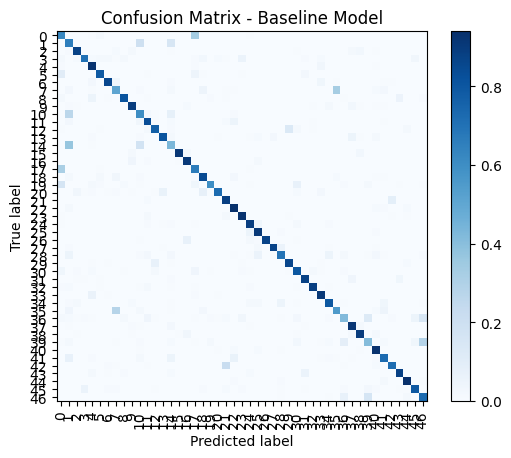

In [13]:
best_model = knn_model if knn_acc > log_acc else log_model
y_pred_best = best_model.predict(Xf_test)

cm = confusion_matrix(y_test, y_pred_best, normalize='true')

plt.figure(figsize=(20,20))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", xticks_rotation=90, include_values=False, colorbar=True)
plt.title("Confusion Matrix - Baseline Model")
plt.show()

A classification report provides precision, recall, and F1-score for each class, giving deeper insight beyond accuracy.

In [8]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_best))

Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.62      0.53       560
           1       0.40      0.65      0.50       560
           2       0.86      0.87      0.87       560
           3       0.89      0.70      0.78       560
           4       0.77      0.93      0.84       560
           5       0.87      0.79      0.83       560
           6       0.91      0.85      0.88       560
           7       0.55      0.50      0.53       560
           8       0.91      0.81      0.86       560
           9       0.87      0.89      0.88       560
          10       0.52      0.60      0.56       560
          11       0.79      0.83      0.81       560
          12       0.83      0.77      0.80       560
          13       0.89      0.81      0.85       560
          14       0.46      0.43      0.45       560
          15       0.98      0.91      0.94       560
          16       0.85      0.90      0.87       560
   

The best performing baseline model is saved for reuse and further experimentation.

In [9]:
joblib.dump(best_model, "../models/baseline_model.pkl")
print("Baseline model saved.")

Baseline model saved.


Conclusions:

- Baseline models provide initial performance benchmarks.
- The EMNIST dataset is challenging due to high intra-class variation and inter-class similarity.
- Certain characters are frequently confused, highlighting the limitations of classical models.
- These results justify the need for more expressive models and further optimization.

The next notebook will focus on improving performance through model optimization and advanced approaches.